In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('weight-height.csv')
df.shape
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df.groupby('Gender').sum()


,Height,Weight
Gender,,
Female,318543.868017,679300.465037
Male,345131.729531,935103.103291


In [4]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


C:\Users\ashut\AppData\Local\Temp\ipykernel_15196\2706343961.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])
C:\Users\ashut\AppData\Local\Temp\ipykernel_15196\2706343961.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

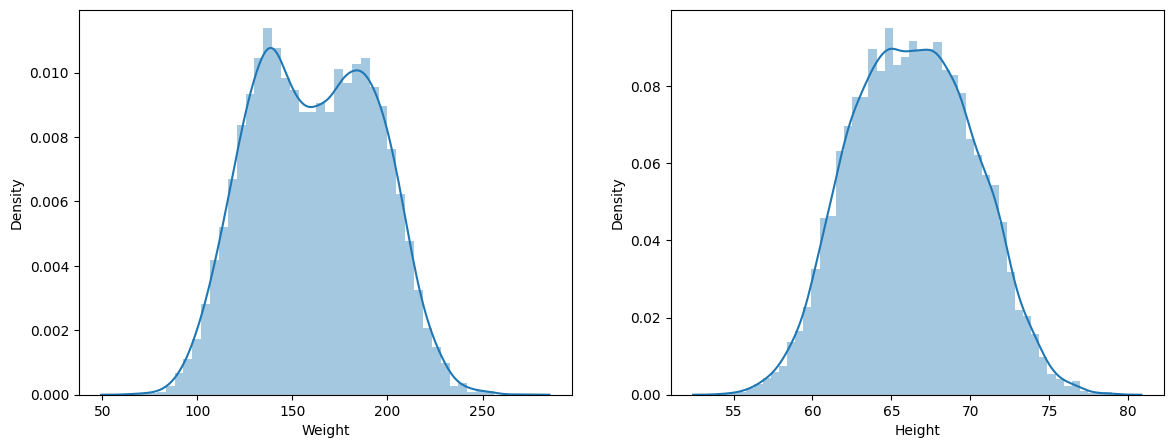

In [5]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.distplot(df['Weight'])

plt.subplot(1,2,2)
sns.distplot(df['Height'])

In [6]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
from sklearn.pipeline import Pipeline

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
from sklearn.compose import ColumnTransformer

In [11]:
from sklearn.preprocessing import OneHotEncoder

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [14]:
numerical_col = [1,2]

In [15]:
# pehle bhai tranformation karoge tab na pipeling use karoge babu

In [24]:
trf1 = ColumnTransformer([
    ('standard_scaler' , StandardScaler() , [0]),
    ('MinMax',MinMaxScaler(),[1])
],remainder='passthrough')

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
pipe = Pipeline(steps=[
    ('scale',trf1),
    ('predict',DecisionTreeClassifier())
])
pipe

Pipeline(steps=[('scale',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standard_scaler',
                                                  StandardScaler(), [0]),
                                                 ('MinMax', MinMaxScaler(),
                                                  [1])])),
                ('predict', DecisionTreeClassifier())])

In [27]:
def covert(gender):
    if(gender == "Male"):
        return 1 
    return 0 

In [28]:
y = df['Gender'].apply(covert)
y

0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Gender, Length: 10000, dtype: int64

In [29]:
x_train = df.drop(columns=['Gender'])
x_train

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
9995,66.172652,136.777454
9996,67.067155,170.867906
9997,63.867992,128.475319
9998,69.034243,163.852461


In [32]:
clf =  pipe.fit(x_train,y)
clf.steps

[('scale',
  ColumnTransformer(remainder='passthrough',
                    transformers=[('standard_scaler', StandardScaler(), [0]),
                                  ('MinMax', MinMaxScaler(), [1])])),
 ('predict', DecisionTreeClassifier())]

In [ ]:
trf_columns

array([[ 1.94406149,  0.863139  ],
       [ 0.62753668,  0.4754764 ],
       [ 2.01244346,  0.72113127],
       ...,
       [-0.64968792,  0.31065968],
       [ 0.69312469,  0.48298768],
       [-1.14970831,  0.23843869]], shape=(10000, 2))

In [ ]:
trf_columns[:,0].mean()
trf_columns[:,1].mean()

np.float64(0.47123791664356385)

In [ ]:
clf =  DecisionTreeClassifier()
clf.fit(trf_columns,y)

DecisionTreeClassifier()

In [ ]:
def predict(height  , weight ) :
    global clf 
    input_data = np.array(height,weight).reshape(1,2)
    res = clf.predict(input_data)[0] 
    if res == 1 :
        return "Male"
    return "Female"

In [37]:
predict(120,60)

TypeError: Cannot interpret '60' as a data type

# Percentile 

In [ ]:
upper_limit_height = df['Height'].quantile(0.99)
lower_limit_height = df['Height'].quantile(0.01)

In [ ]:
print(upper_limit_height)
print(lower_limit_height)

74.7857900583366
58.13441158671655


In [ ]:
upper_limit_weight = df['Weight'].quantile(0.99)
lower_limit_weight = df['Weight'].quantile(0.01)

In [ ]:
print(upper_limit_weight)
print(lower_limit_weight)

227.43736983602577
97.03287365980914


In [ ]:
height_mask = (df['Height'] <= upper_limit_height) & (df['Height'] >= lower_limit_height)
height_mask

0       True
1       True
2       True
3       True
4       True
        ... 
9995    True
9996    True
9997    True
9998    True
9999    True
Name: Height, Length: 10000, dtype: bool

In [ ]:
df = df[height_mask]

In [ ]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [ ]:
weight_mask = (df['Weight'] <= upper_limit_weight) & (df['Weight'] >= lower_limit_weight)

In [ ]:
df = df[height_mask &  weight_mask]

C:\Users\ashut\AppData\Local\Temp\ipykernel_1392\3327729418.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[height_mask &  weight_mask]


In [ ]:
df.shape

(9710, 3)

# capping


In [ ]:
df = pd.read_csv('weight-height.csv')

In [ ]:
df['Height'] = np.where(df['Height'] > upper_limit_height , upper_limit_height , np.where(df['Height'] < lower_limit_height , lower_limit_height , df['Height'] ))

In [ ]:
df['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

In [ ]:
df['Weight'] = np.where(df['Weight'] > upper_limit_weight , upper_limit_weight , np.where(df['Weight'] < lower_limit_weight , lower_limit_height , df['Weight']))

In [ ]:
df['Weight'].describe()

count    10000.000000
mean       161.033584
std         32.777819
min         58.134412
25%        135.818051
50%        161.212928
75%        187.169525
max        227.437370
Name: Weight, dtype: float64